In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from plaidml.keras import install_backend
#Habilitamos el procesamiento para gpu amd
install_backend()

In [5]:
#Cargamos los datos
data = pd.read_csv('data/fashion-mnist_train.csv')

In [6]:
#Visualizamos los primeros datos
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Tomamos los datos de los pixeles
X = data.drop('label', axis=1).values

In [13]:
#Comprobamos la forma del vector
X.shape

(60000, 784)

In [76]:
#Lo convertimos a imagen 28*28=784
X = X.reshape(X.shape[0],28,28)

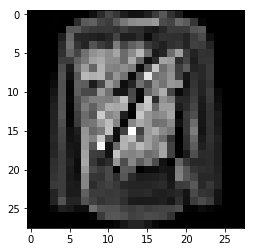

In [77]:
#visualizamos la imagen
plt.imshow(X[15], cmap='gray')

In [28]:
#Buscamos las etiquetas
y = data['label'].values

In [29]:
from keras.utils import to_categorical

In [45]:
#Convertimos las etiquetas en valores categoricos
#Para eso checaremos el valor maximo de y
y = y.reshape(-1,1)
print('Valor maximo ',y.max())
print('Valor minimo',y.min())

Valor maximo  1.0
Valor minimo 0.0


In [42]:
y = to_categorical(y, num_classes=10) 

In [43]:
y.shape

(60000, 10)

In [54]:
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.models import Sequential

In [61]:
#Definiendo las constantes
BATCH_SIZE = 64
EPOCH = 20
IMG_COLS = 28
IMG_ROWS = 28
NUM_CLASSES = 10

In [78]:
X = X.reshape(X.shape[0],28,28,1)
X = X / 255

In [84]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

/home/hxc/.conda/envs/keras/lib/python3.5/site-packages/numpy/ctypeslib.py:519: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return array(obj, copy=False)


In [57]:
model.fit(X, y, batch_size=BATCH_SIZE, epochs=EPOCH, verbose=1)

(60000, 28, 28)